In [53]:
from main import get_stock_data, add_fin_ratios_and_commodities
import matplotlib.pyplot as plt
import numpy as np
abca = get_stock_data('ABCA.PA', lookback = '5y')
abca = add_fin_ratios_and_commodities(abca)
abca.tail()

B:\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Open,High,Low,Close,Volume,Returns,Log Returns,Gold Close,WTI Oil Close,5Y TY ^FVX,CAC 40,CAC Returns
date,,,,,,,,,,,,
2022-11-24,6.51,6.55,6.51,6.51,15929,0.000000,0.000000,NaN,NaN,NaN,6707.319824,0.004227
2022-11-25,6.51,6.56,6.50,6.54,5196,0.004608,0.004598,1753.300049,76.279999,3.870,6712.479980,0.000769
2022-11-28,6.58,6.58,6.50,6.52,12309,-0.003058,-0.003063,1740.099976,77.239998,3.896,6665.200195,-0.007044
2022-11-29,6.52,6.65,6.52,6.65,25941,0.019939,0.019742,1748.400024,78.199997,3.920,6668.970215,0.000566
2022-12-01,6.76,6.86,6.74,6.81,36559,0.024060,0.023775,1816.099976,82.160004,3.699,6753.970215,0.012746


In [54]:
#add realized rolling beta over the period (needs added financial ratio first)
def add_roll_beta(df, period):
    stock_to_mkt_ret = df[['Returns','CAC Returns']]
    cov = stock_to_mkt_ret.iloc[:,0].rolling(period).cov(stock_to_mkt_ret.iloc[:,1])
    market_var = stock_to_mkt_ret.iloc[:,1].rolling(period).var()
    df["beta "+str(period)] = cov / market_var
    return df

In [55]:
add_roll_beta(abca, 10)

,Open,High,Low,Close,Volume,Returns,Log Returns,Gold Close,WTI Oil Close,5Y TY ^FVX,CAC 40,CAC Returns,beta 10
date,,,,,,,,,,,,,
2017-12-01,4.793162,4.823308,4.717798,4.747944,81065,NaN,NaN,1278.800049,58.360001,2.118,5316.890137,NaN,NaN
2017-12-04,4.747945,4.785627,4.740409,4.763018,36275,0.003175,0.003170,1274.300049,57.470001,2.148,5389.290039,0.013617,NaN
2017-12-05,4.747944,4.785626,4.710262,4.710262,69723,-0.011076,-0.011138,1261.599976,57.619999,2.151,5375.529785,-0.002553,NaN
2017-12-06,4.717798,4.785626,4.710262,4.778090,58460,0.014400,0.014297,1262.800049,55.959999,2.120,5374.350098,-0.000219,NaN
2017-12-07,4.785626,4.785626,4.755480,4.778090,37550,0.000000,0.000000,1249.800049,56.689999,2.146,5383.859863,0.001769,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,6.510000,6.550000,6.510000,6.510000,15929,0.000000,0.000000,NaN,NaN,NaN,6707.319824,0.004227,-0.099667
2022-11-25,6.510000,6.560000,6.500000,6.540000,5196,0.004608,0.004598,1753.300049,76.279999,3.870,6712.479980,0.000769,-0.109727
2022-11-28,6.580000,6.580000,6.500000,6.520000,12309,-0.003058,-0.003063,1740.099976,77.239998,3.896,6665.200195,-0.007044,0.021132


In [59]:
abca

,Open,High,Low,Close,Volume,Returns,Log Returns,Gold Close,WTI Oil Close,5Y TY ^FVX,CAC 40,CAC Returns,beta 10,rs
date,,,,,,,,,,,,,,
2017-12-01,4.793162,4.823308,4.717798,4.747944,81065,NaN,NaN,1278.800049,58.360001,2.118,5316.890137,NaN,NaN,NaN
2017-12-04,4.747945,4.785627,4.740409,4.763018,36275,0.003175,0.003170,1274.300049,57.470001,2.148,5389.290039,0.013617,NaN,NaN
2017-12-05,4.747944,4.785626,4.710262,4.710262,69723,-0.011076,-0.011138,1261.599976,57.619999,2.151,5375.529785,-0.002553,NaN,NaN
2017-12-06,4.717798,4.785626,4.710262,4.778090,58460,0.014400,0.014297,1262.800049,55.959999,2.120,5374.350098,-0.000219,NaN,NaN
2017-12-07,4.785626,4.785626,4.755480,4.778090,37550,0.000000,0.000000,1249.800049,56.689999,2.146,5383.859863,0.001769,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,6.510000,6.550000,6.510000,6.510000,15929,0.000000,0.000000,NaN,NaN,NaN,6707.319824,0.004227,-0.099667,0.483953
2022-11-25,6.510000,6.560000,6.500000,6.540000,5196,0.004608,0.004598,1753.300049,76.279999,3.870,6712.479980,0.000769,-0.109727,0.750050
2022-11-28,6.580000,6.580000,6.500000,6.520000,12309,-0.003058,-0.003063,1740.099976,77.239998,3.896,6665.200195,-0.007044,0.021132,0.198197


In [108]:
def rolling_sharpe(df, window):
    return np.sqrt(window) * (df.mean() / df.std())

def rolling_sortino(df, window):
    return np.sqrt(window) * (df.mean() / df[y<0].std())

def rolling_var(df, alpha):
    
https://towardsdatascience.com/using-reinforcement-learning-to-trade-bitcoin-for-massive-profit-b69d0e8f583b  
https://www.google.com/search?q=Omega+ratio&sourceid=chrome&ie=UTF-8
https://en.wikipedia.org/wiki/Upside_potential_ratio  
http://www.turingfinance.com/computational-investing-with-python-week-one/
    https://riskfolio-lib.readthedocs.io/en/latest/
abca['sharpe 1y'] = abca['Returns'].rolling(365).apply(rolling_sharpe, args=(365,))
abca['sortino 1y'] = abca['Returns'].rolling(365).apply(rolling_sharpe, args=(365,))
abca['var 1y'] = abca['Returns'].rolling(365).apply(rolling_var)

In [ ]:



etape selection meilleurs actions par groupe






In [116]:
#var
sorted_returns = np.sort(abca['Returns'])
alpha = 0.05
ind_alpha = int(alpha*len(sorted_returns))
sorted_returns[ind_alpha], sorted_returns[-ind_alpha]

(-0.014084503098032441, 0.017735238029940037)

In [ ]:
regression sur 20 jours / 10 jours

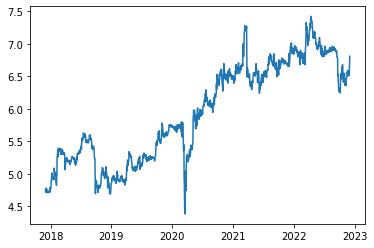

In [109]:
plt.plot(abca['Close'])

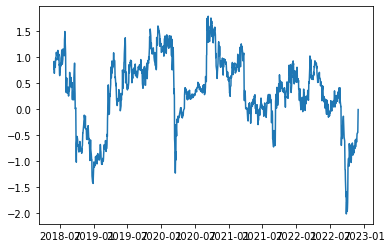

In [110]:
plt.plot(abca['rs'])

In [3]:
import urllib.request
import zipfile
import pandas as pd
#ratios mensuels
url = 'http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Europe_5_Factors_CSV.zip'

#read data from url
factors = pd.read_csv(url, skiprows=3).astype(str)
factors.rename(columns = {factors.columns[0] : 'date'},inplace=True)

#remove spacing problem
for col in factors.columns : 
    factors[col] = factors[col].apply(lambda x : x.strip())

#drop annual info at the end of file
annual_factors_index_cut = factors[factors['date'] == 'Annual Factors: January-December'].index[0]
factors.drop(factors.index[annual_factors_index_cut:], inplace=True)
factors['date'] = pd.to_datetime(factors['date'], format = '%Y%m') + pd.offsets.MonthEnd()
factors.iloc[:,1:] = factors.iloc[:,1:].astype(float)
factors.iloc[:,1:] = factors.iloc[:,1:]/100
factors = factors[factors['date'] > "2016-01-01"]
factors.tail()

#append monthly return from stock
montly_returns = data.Close.resample('M').last().pct_change().dropna()
montly_returns.name = "Month_Rtn"
factors = factors.merge(montly_returns,on='date')
factors.tail()

NameError: name 'data' is not defined

In [1]:
#rolling regression avec daily => pb manque un mois
X = factors[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
y = factors['Month_Rtn'] - factors['RF']
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
b1, b2, b3, b4, b5 = ff_model.params

rf = factors['RF'].mean()
market_premium = factors['Mkt-RF'].mean()
size_premium = factors['SMB'].mean()
value_premium = factors['HML'].mean()
rmw_premium = factors['RMW'].mean()
cma_premium = factors['CMA'].mean()


expected_monthly_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium + b4 * rmw_premium + b5 * cma_premium 
expected_monthly_return

NameError: name 'factors' is not defined

In [ ]:
si rentabilité du marché > rentabilité prédite ==> sur évaluation
si inférieure, opportunité